<img src="https://bit.ly/2VnXWr2" width="100" align="left">

# Project | ML: Job offers' Fraud-Detection with NLP

## Introduction

In order to experience how to work in a ML project as a group, and to learn more on NLP we have been working on this dataset from Kaggle, [[Real or Fake] Fake Job Posting Prediction](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction), that holds around 18K job descriptions out of which about 900 are fake. The data consists of both textual information and meta-information about the jobs. 

### Objectives

 We mainly wanted to create a **classification model using text data features and meta-features to predict which job descriptions are fraudulent**. As well as, finding out if there are **key traits/features** (words, entities, phrases) of job descriptions which are **intrinsically fraudulent**.

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer
import operator
import nltk
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
import spacy
from nltk.stem.snowball import SnowballStemmer
from spacy.lang.en.stop_words import STOP_WORDS
import re
import itertools
import string
from spacy.lang.en import English
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

## 1.EDA

### Context

As said above, we've worked on a dataset of job descriptions and their meta information in which a small proportion of these descriptions were fake or scam, which can be identified by the column "fraudulent".

**Columns**:
* `job_id` Unique Job ID
* `title` The title of the job ad entry.
* `location` Geographical location of the job ad.
* `department` Corporate department (e.g. sales).f
* `salary_range` Indicative salary range (e.g. $50,000-$60,000)
* `company_profile` A brief company description.
* `description` The details description of the job ad.
* `requirements` Enlisted requirements for the job opening.
* `benefits` Enlisted offered benefits by the employer.
* `telecommuting` True for telecommuting positions.
* `has_company_logo` True if company logo is present.
* `has_questions` True if screening questions are present.
* `employment_type` Full-type, Part-time, Contract, etc.
* `required_experience` Executive, Entry level, Intern, etc.
* `required_education` Doctorate, Master’s Degree, Bachelor, etc.
* `industry Automotive` IT, Health care, Real estate, etc.
* `function Consulting` Engineering, Research, Sales etc.
* `fraudulent` **target** Classification attribute

### Global EDA

#### Read dataset and check head

In [2]:
data = pd.read_csv("data/fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### Check shape

In [3]:
data.shape

(17880, 18)

#### Check dtypes and columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

#### Check nulls

In [5]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

#### Check duplicates

In [6]:
data.duplicated().sum()

0

#### Check uniques

In [7]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

#### Target variable distribution

In [8]:
data.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

#### See some descriptive statistics of numerical variables

In [9]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


#### Visualization categorical values

In [10]:
data_1 = data.copy()

We will use countplots to visualize most common words in categorical columns, which are not whole sentences/paragraphs, from fraudulent offers against real ones.

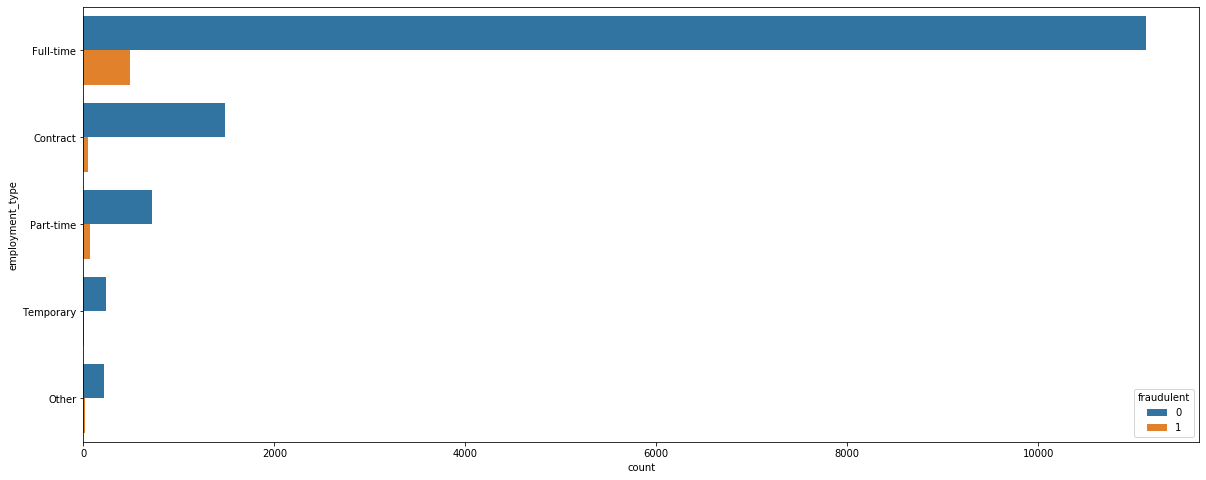

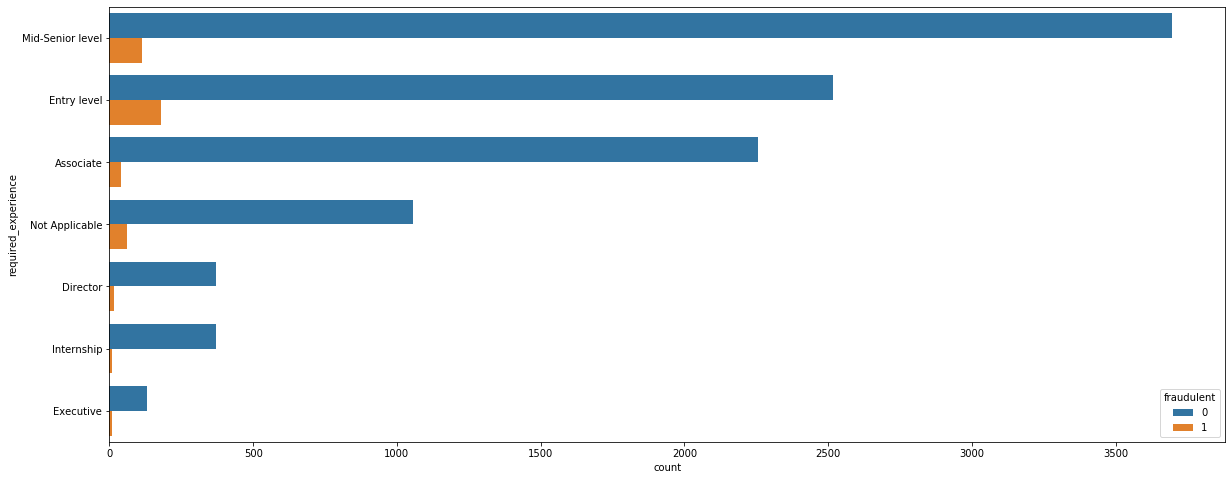

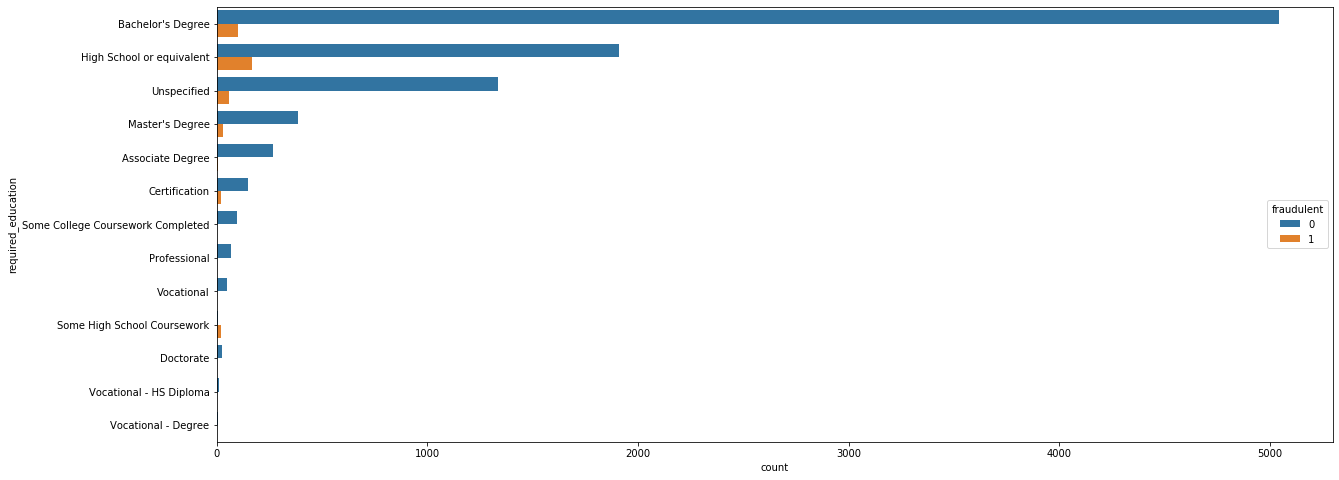

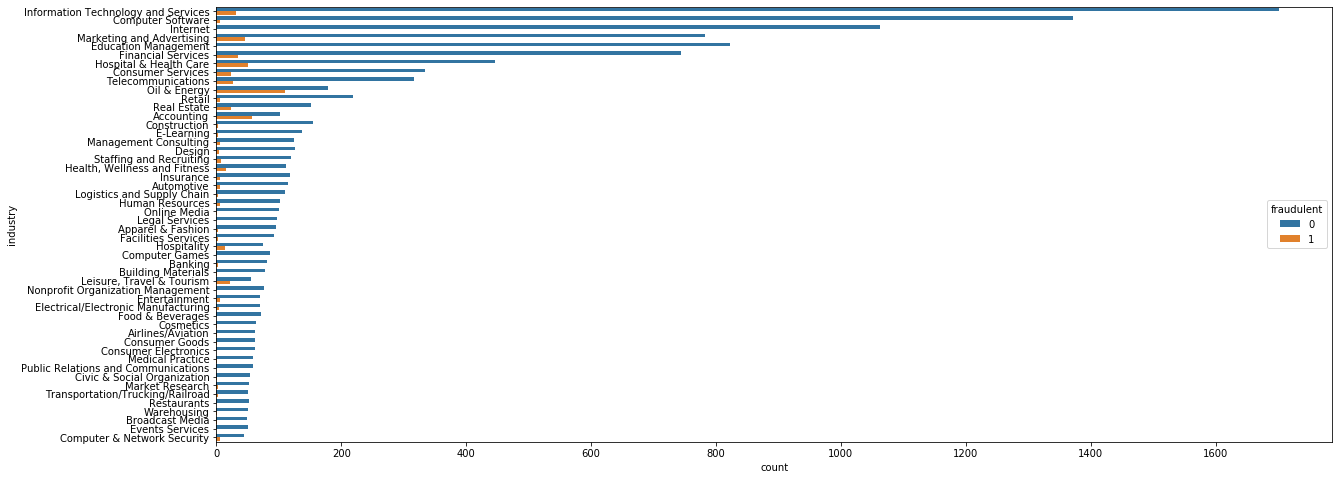

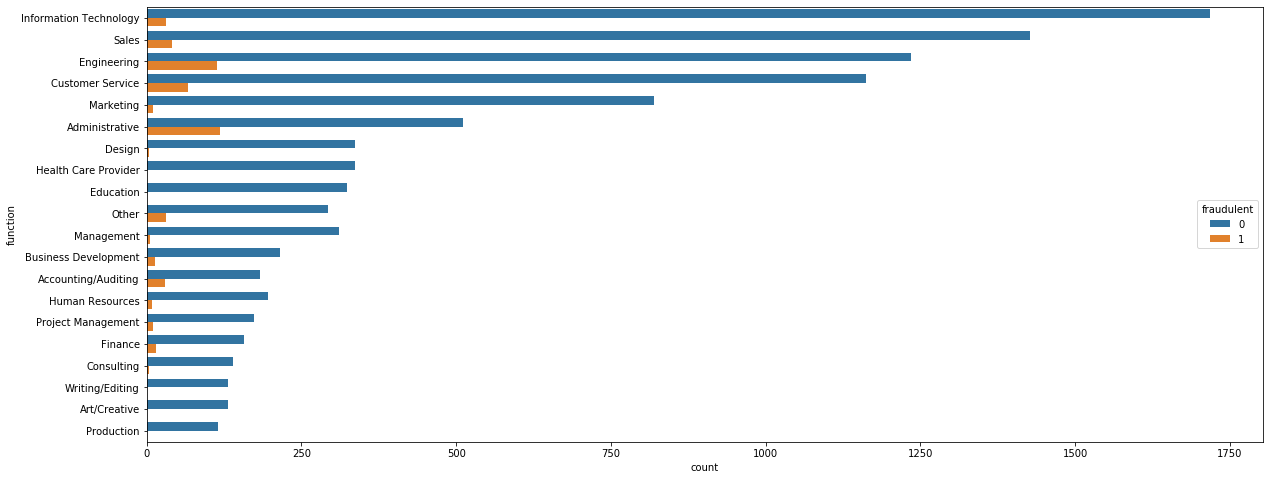

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="employment_type",data=data_1,
                   order=data_1.employment_type.value_counts().iloc[:20].index)

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="required_experience",data=data_1,
                   order=data_1.required_experience.value_counts().iloc[:20].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="required_education",data=data_1,
                   order=data_1.required_education.value_counts().iloc[:20].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="industry",data=data_1,
                   order=data_1.industry.value_counts().iloc[:50].index)

fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="function",data=data_1,
                   order=data_1.function.value_counts().iloc[:20].index)


plt.show()

I will use wordclouds to visualize most common words in categorical columns which are whole sentences/paragraphs from fraudulent offers.

In [12]:
data_1 = data_1.loc[data_1["fraudulent"]==1]

In [13]:
for value in data_1[["title","department","company_profile","description","requirements","benefits"]]:
    data_1[value]= data_1[value].astype(str, errors="ignore")

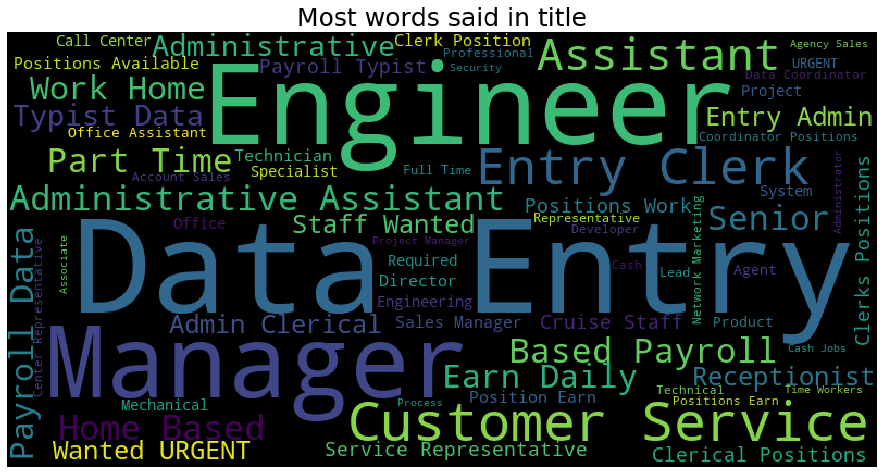

In [14]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["title"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in title", fontsize=25)
plt.show()

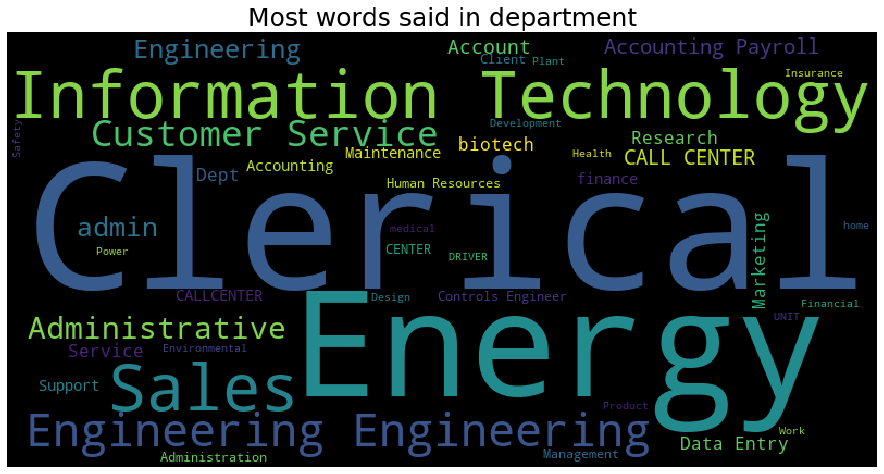

In [15]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["department"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in department", fontsize=25)
plt.show()

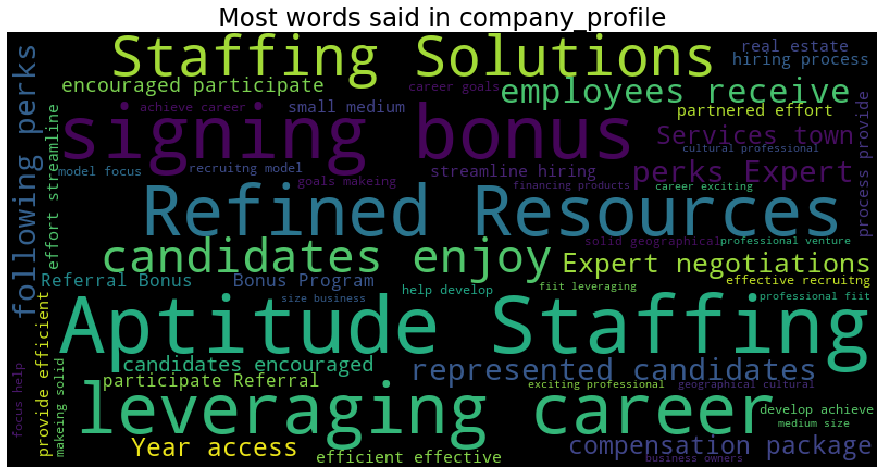

In [16]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["company_profile"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in company_profile", fontsize=25)
plt.show()

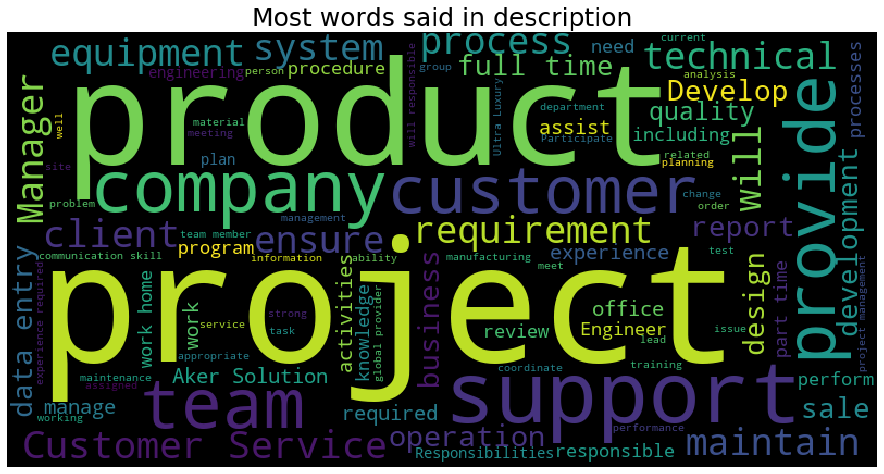

In [17]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["description"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in description", fontsize=25)
plt.show()

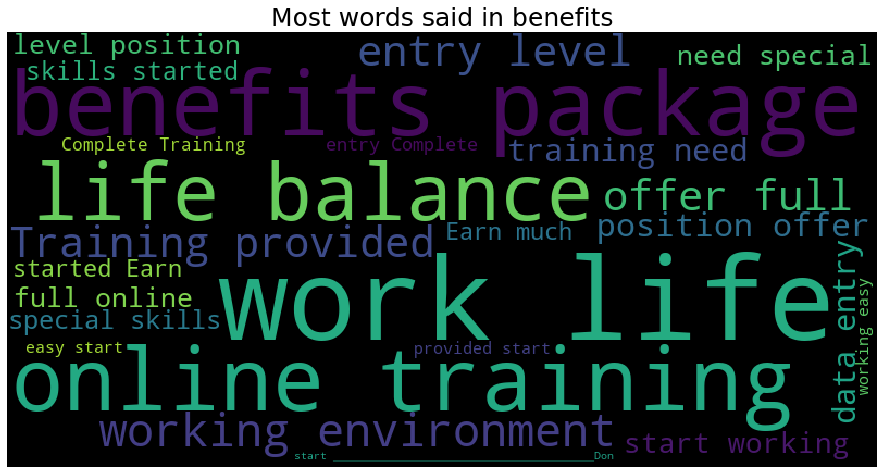

In [18]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10, max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["benefits"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in benefits", fontsize=25)
plt.show()

#### Comments

### Location

In [19]:
# Split of localitation column

# new data frame with split value columns 
new = data["location"].str.split(",", n = 2, expand = True)
  
# making separate columns from new data frame 
data["country"]= new[0] 
data["region"]= new[1]
data["city"] = new[2]


data['country'].value_counts() # La distribución del 3r contry es menor a mil, y luego baja en picado.
top_countries = data['country'].value_counts().head(2).index
other_countries = data['country'][~data['country'].isin(top_countries)].unique()

data['country'] = data[['country']].replace(other_countries, 'other')
data['country'] = data[['country']].replace("US", 'us')
data[['country']] = data[['country']].replace("GB", 'gb')
print(data['country'].value_counts())

us       10656
other     4840
gb        2384
Name: country, dtype: int64


#### One hot encoding

In [20]:
categorical_column = ["country"]

for column in categorical_column:
    encoded = pd.get_dummies(data[column])
    data = pd.concat([data, encoded], axis=1)
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_education,industry,function,fraudulent,country,region,city,gb,other,us
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,NaN,NaN,Marketing,0,us,NY,New York,0,0,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,NaN,Marketing and Advertising,Customer Service,0,other,,Auckland,0,1,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,NaN,NaN,NaN,0,us,IA,Wever,0,0,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Bachelor's Degree,Computer Software,Sales,0,us,DC,Washington,0,0,1
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,us,FL,Fort Worth,0,0,1


#### Comments

###  Salary Range

In [21]:
# Check if benefit contains digits

# Pattern startswith $ + digit + optional ?
# reset index for multindex result
salary_rows_in_benefits = data['benefits'].str.extractall(r'(\$\d+\,?\d+)').reset_index()['level_0'].unique()
salary_rows_in_description = data['description'].str.extractall(r'(\$\d+\,?\d+)').reset_index()['level_0'].unique()

#### One hot encoding

In [22]:
data['salary_range_cat'] = data['salary_range']
data.loc[salary_rows_in_benefits, 'salary_range_cat'] = 1
data.loc[salary_rows_in_description, 'salary_range_cat'] = 1

nan_salaries = data['salary_range_cat'].isnull()
with_salaries = list(data['salary_range_cat'][~data['salary_range_cat'].isnull()].unique())

data['salary_range_cat'] = data['salary_range_cat'].replace(with_salaries, 1)
data['salary_range_cat'] = data['salary_range_cat'].fillna(0)
print(data['salary_range_cat'].value_counts())

0.0    13275
1.0     4605
Name: salary_range_cat, dtype: int64


### Categorical columns: Fewer uniques

Explicar que són y despues el proceso. Lo hago antes que las otras por justificar las variables que finalmente pasamos a las de text para el BoW

#### One hot encoding

In [23]:
data_2 = data.copy()

In [24]:
categorical_columns = data_2[["employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]

In [25]:
categorical_columns.head()

,employment_type,required_experience,required_education,industry,function,fraudulent
0,Other,Internship,NaN,NaN,Marketing,0
1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,NaN,NaN,NaN,NaN,NaN,0
3,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [26]:
categorical_columns_filled = categorical_columns.fillna("Other")

In [27]:
categorical_columns = "employment_type", "required_experience", "required_education", "industry", "function"

for column in categorical_columns:
    categorical_columns_filled[column] = categorical_columns_filled[column].str.lower() 
    categorical_columns_filled.columns = map(str.lower, categorical_columns_filled.columns)

In [28]:
categorical_columns_filled.head()

,employment_type,required_experience,required_education,industry,function,fraudulent
0,other,internship,other,other,marketing,0
1,full-time,not applicable,other,marketing and advertising,customer service,0
2,other,other,other,other,other,0
3,full-time,mid-senior level,bachelor's degree,computer software,sales,0
4,full-time,mid-senior level,bachelor's degree,hospital & health care,health care provider,0


In [29]:
unique_industries_percentage = categorical_columns_filled.industry.value_counts()/len(categorical_columns_filled)*100
unique_industries_percentage.head()

other                                  27.421700
information technology and services     9.697987
computer software                       7.695749
internet                                5.939597
marketing and advertising               4.630872
Name: industry, dtype: float64

In [30]:
unique_industries_indexes = list(unique_industries_percentage[unique_industries_percentage >= 1].index)
unique_industries_indexes

['other',
 'information technology and services',
 'computer software',
 'internet',
 'marketing and advertising',
 'education management',
 'financial services',
 'hospital & health care',
 'consumer services',
 'telecommunications',
 'oil & energy',
 'retail']

In [31]:
other = categorical_columns_filled["industry"][~categorical_columns_filled["industry"].isin(unique_industries_indexes)].unique()
categorical_columns_filled["industry"].replace(other,"other", inplace=True)

In [32]:
vals_to_replace = {"not applicable":"other", "mid-senior level":"associate", "director":"executive"}
categorical_columns_filled["required_experience"] = categorical_columns_filled["required_experience"].replace(vals_to_replace)


vals_to_replace = {"information technology and services":"information technologies","internet":"information technologies",
                   "computer software":"information technologies", "telecommunications":"information technologies"}
categorical_columns_filled["industry"] = categorical_columns_filled["industry"].replace(vals_to_replace)


vals_to_replace = {"unspecified":"other","some high school coursework":"high school or equivalent",
                   "vocational - hs diploma":"high school or equivalent", "mid-senior level":"associate",
                   "some college coursework completed":"associate degree", "professional":"vocational",
                   "vocational - degree":"vocational","certification":"vocational"}
categorical_columns_filled["required_education"] = categorical_columns_filled["required_education"].replace(vals_to_replace)


vals_to_replace = {"design":"marketing", "public relations":"marketing", "advertising":"marketing", "art/creative":"marketing", 
                   "financial analyst":"finance", "accounting/auditing":"finance","financial analyst":"finance",
                   "training":"human resources","data analyst":"information technology","supply chain":"production",
                   "manufacturing":"production", "quality assurance":"production","project management":"management",
                   "product management":"management", "strategy/planning": "management","sales":"business development",
                   "general business":"business development", "business analyst":"business development",
                   "purchasing":"business development","research":"research and development",
                   "science":"research and development"}
categorical_columns_filled["function"] = categorical_columns_filled["function"].replace(vals_to_replace)

categorical_columns_clean = categorical_columns_filled

categorical_columns_clean.head()

,employment_type,required_experience,required_education,industry,function,fraudulent
0,other,internship,other,other,marketing,0
1,full-time,other,other,marketing and advertising,customer service,0
2,other,other,other,other,other,0
3,full-time,associate,bachelor's degree,information technologies,business development,0
4,full-time,associate,bachelor's degree,hospital & health care,health care provider,0


In [33]:
categorical_column = ["employment_type", "required_experience", "required_education","industry", "function"]
count=0

for column in categorical_column:
    if count == 0:
        encoded = pd.get_dummies(categorical_columns_clean[column])
        encoding = pd.concat([categorical_columns_clean, encoded], axis=1)
        count += 1
        categorical_column.remove(column)
    for column in categorical_column:
        if count > 0 and count <4:
            encoded = pd.get_dummies(encoding[column])
            encoding = pd.concat([encoding, encoded], axis=1)
            count +=1
        elif count == 4:
            encoded = pd.get_dummies(encoding[column])
            data_2_clean = pd.concat([encoding, encoded], axis=1)
data_2_clean.head()

,employment_type,required_experience,required_education,industry,function,fraudulent,contract,full-time,other,part-time,...,health care provider,human resources,information technology,legal,management,marketing,other,production,research and development,writing/editing
0,other,internship,other,other,marketing,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,full-time,other,other,marketing and advertising,customer service,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,other,other,other,other,other,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,full-time,associate,bachelor's degree,information technologies,business development,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,full-time,associate,bachelor's degree,hospital & health care,health care provider,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
data_2_clean = data_2_clean.drop(["employment_type", "required_experience", "required_education","industry", "function"], axis = 1)

### Numerical columns

At first we only got 5 numerical columns being one of them an index ("job_id"). Now after dong some transformations and use one hot encoding we have more numerical values that we will work on as a group of variables.

In [35]:
numerical_columns = pd.merge(data,data_2_clean, left_index=True, right_index=True)

In [36]:
numerical_variables = numerical_columns.drop(["job_id", "title", "location", "department","salary_range","company_profile",
                                              "description", "requirements", "benefits","employment_type", "required_experience",
                                              "required_education" ,"industry" , "function", "country","fraudulent_y", "region",
                                             "city"],
                                             axis = 1)
numerical_renamed = numerical_variables.rename(columns={"fraudulent_x": "fraudulent"})

As there is multiple columns called other or similarly, and they have lots of values we want to plot the this dataset dropping those columns

In [37]:
numerical_cols_no_other = numerical_renamed.loc[:,~numerical_renamed.columns.str.contains('^other')]

In [38]:
numerical_cols_no_other.to_csv("numerical.csv")

'Esto no sé como tratarlo, o simplemente suelto que se puede ver como la correlación es casi nula en general con pocas excepciones con correlaciones bajas'

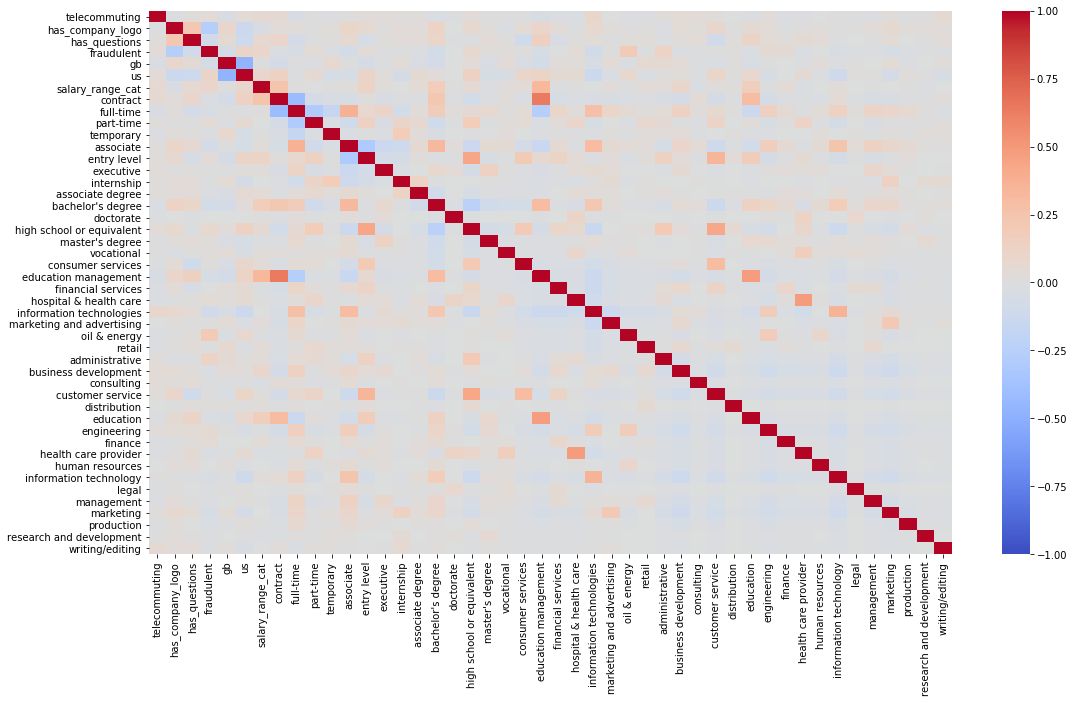

In [39]:
plt.figure(figsize=(18,10))
sns.heatmap(numerical_cols_no_other.corr(), cmap='coolwarm', vmin=-1, vmax=1) 
'''Esto no sé como tratarlo, o simplemente suelto que se puede ver como la correlación es casi nula en general con pocas excepciones con correlaciones bajas'''

In [40]:
numerical_cols_no_other.corr().sort_values(by=["fraudulent"], ascending=False, axis=1)

,fraudulent,oil & energy,administrative,us,salary_range_cat,high school or equivalent,finance,engineering,part-time,hospital & health care,...,full-time,information technology,marketing,education management,gb,associate,bachelor's degree,has_questions,information technologies,has_company_logo
telecommuting,0.034523,-0.020451,0.019424,0.038750,0.064042,0.038649,-0.018084,0.025273,0.014460,-0.030760,...,-0.035566,0.012250,0.018125,-0.042520,-0.035944,0.008190,-0.029086,0.020345,0.086640,-0.019836
has_company_logo,-0.261971,0.004134,-0.022585,-0.126196,-0.036253,0.076016,-0.009773,0.046166,0.000097,-0.015401,...,0.027778,0.005853,0.066397,0.098793,0.092564,0.104320,0.127426,0.233932,0.070518,1.000000
has_questions,-0.091627,0.021254,-0.009578,-0.115085,0.065396,-0.014021,0.022202,0.042015,0.001679,0.014028,...,-0.063046,-0.014149,0.044073,0.152137,0.050593,0.065003,0.101833,1.000000,0.035631,0.233932
fraudulent,1.000000,0.197139,0.125031,0.113554,0.100661,0.070581,0.049718,0.047078,0.044686,0.042675,...,-0.039762,-0.045269,-0.048494,-0.049525,-0.070864,-0.077317,-0.085854,-0.091627,-0.093330,-0.261971
gb,-0.070864,-0.030460,0.047295,-0.476378,0.001881,0.025909,-0.002834,0.002036,-0.020144,0.017748,...,0.000575,-0.012011,0.039116,-0.070390,1.000000,0.003423,-0.062872,0.050593,-0.040094,0.092564
us,0.113554,0.085211,0.013314,1.000000,0.089543,0.141465,-0.004169,-0.043761,0.055787,0.051169,...,-0.013669,-0.105723,-0.068043,0.124688,-0.476378,-0.047832,0.028630,-0.115085,-0.128091,-0.126196
salary_range_cat,0.100661,-0.009075,0.029651,0.089543,1.000000,0.056235,0.041187,-0.009290,-0.005124,0.000776,...,0.008383,0.025069,-0.000039,0.333017,0.001881,0.020335,0.186151,0.065396,-0.001349,-0.036253
contract,-0.027815,-0.029425,-0.043126,0.138265,0.246194,-0.083932,-0.016646,-0.056819,-0.065933,-0.030901,...,-0.415882,0.046202,-0.038761,0.634028,-0.069056,-0.050872,0.219652,0.100808,-0.033542,0.027283
full-time,-0.039762,0.054562,0.042334,-0.013669,0.008383,0.060196,0.059817,0.158518,-0.294282,0.015695,...,1.000000,0.134217,0.100354,-0.258771,0.000575,0.370080,0.177493,-0.063046,0.276482,0.027778
part-time,0.044686,-0.023275,0.057206,0.055787,-0.005124,0.181795,0.015106,-0.046281,1.000000,0.095365,...,-0.294282,-0.058655,0.001544,-0.028004,-0.020144,-0.087539,-0.097780,0.001679,-0.053782,0.000097


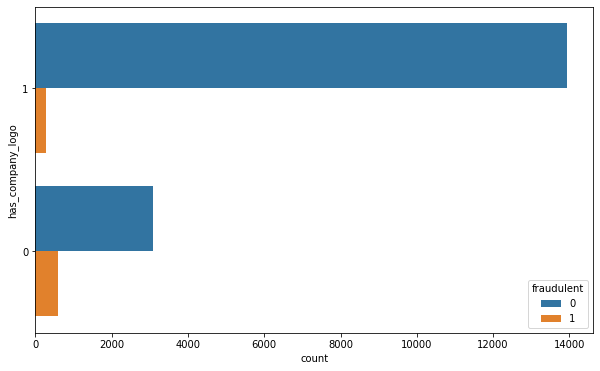

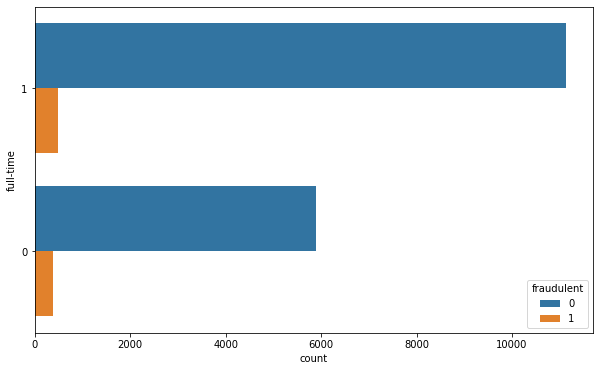

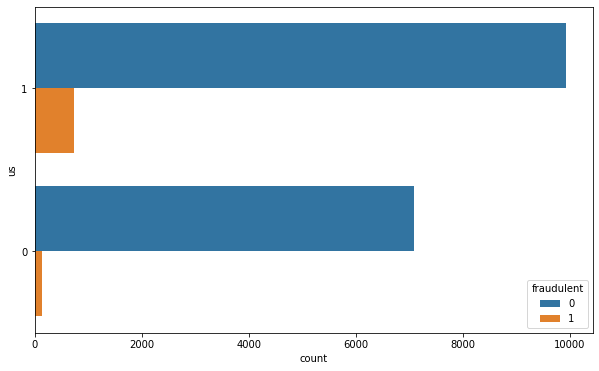

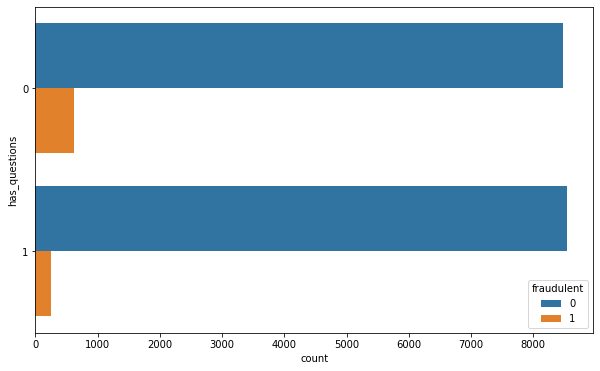

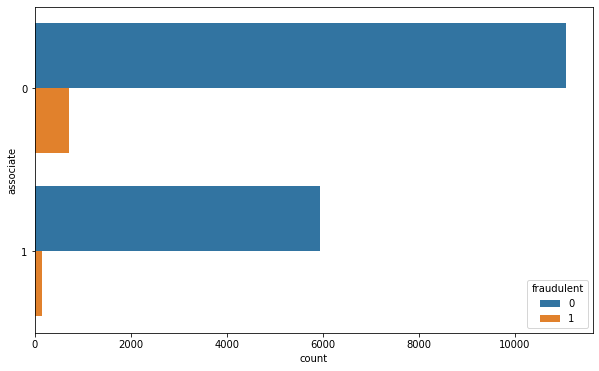

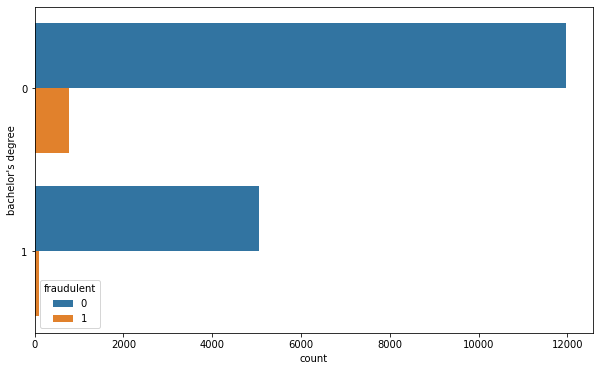

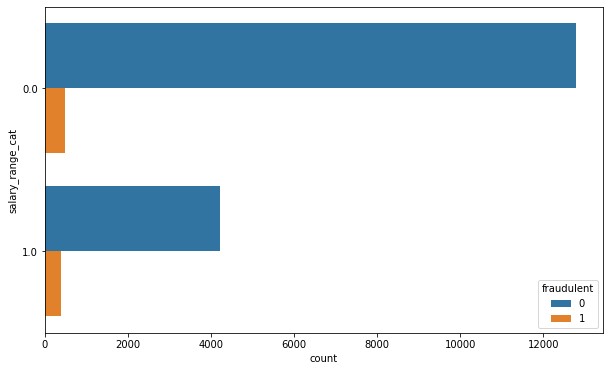

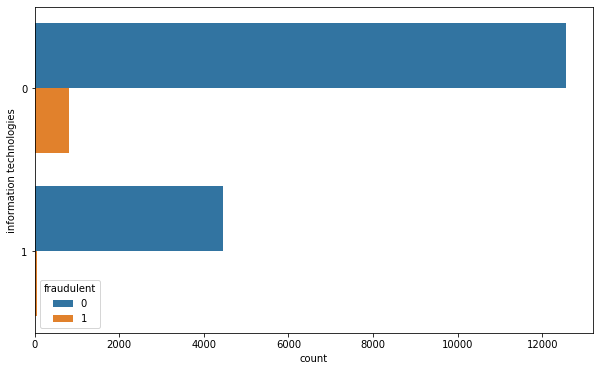

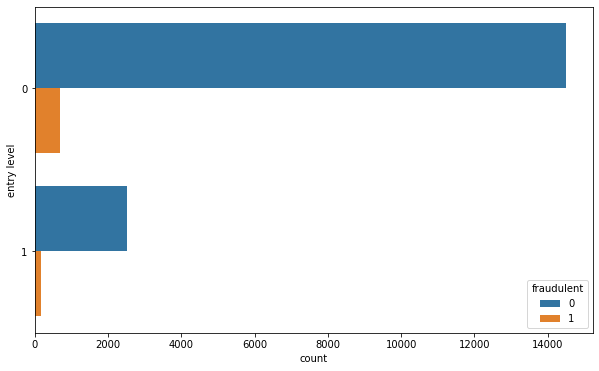

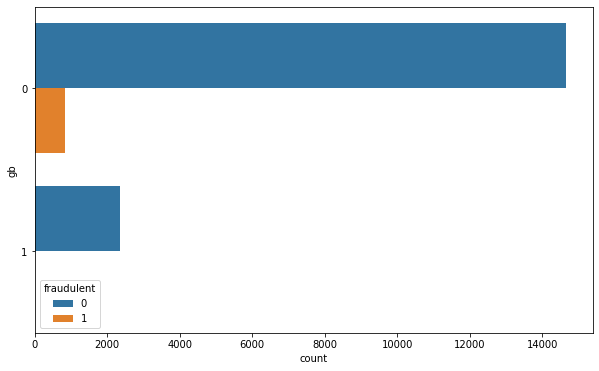

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(hue="fraudulent",y="has_company_logo",data=numerical_cols_no_other,
                   order=numerical_cols_no_other.has_company_logo.value_counts().index)

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(hue="fraudulent",y="full-time",data=numerical_cols_no_other,
                   order=numerical_cols_no_other["full-time"].value_counts().index)
              
fig, ax = plt.subplots(figsize=(10,6))              
ax = sns.countplot(hue="fraudulent",y="us",data=numerical_cols_no_other,
                   order=numerical_cols_no_other.us.value_counts().index)
              
fig, ax = plt.subplots(figsize=(10,6))              
ax = sns.countplot(hue="fraudulent",y="has_questions",data=numerical_cols_no_other,
                   order=numerical_cols_no_other.has_questions.value_counts().index)

fig, ax = plt.subplots(figsize=(10,6))              
ax = sns.countplot(hue="fraudulent",y="associate",data=numerical_cols_no_other,
                   order=numerical_cols_no_other.associate.value_counts().index)

fig, ax = plt.subplots(figsize=(10,6))              
ax = sns.countplot(hue="fraudulent",y="bachelor's degree",data=numerical_cols_no_other,
                   order=numerical_cols_no_other["bachelor's degree"].value_counts().index)

fig, ax = plt.subplots(figsize=(10,6))              
ax = sns.countplot(hue="fraudulent",y="salary_range_cat",data=numerical_cols_no_other,
                   order=numerical_cols_no_other.salary_range_cat.value_counts().index)

fig, ax = plt.subplots(figsize=(10,6))              
ax = sns.countplot(hue="fraudulent",y="information technologies",data=numerical_cols_no_other,
                   order=numerical_cols_no_other["information technologies"].value_counts().index)

fig, ax = plt.subplots(figsize=(10,6))              
ax = sns.countplot(hue="fraudulent",y="entry level",data=numerical_cols_no_other,
                   order=numerical_cols_no_other["entry level"].value_counts().index)

fig, ax = plt.subplots(figsize=(10,6))              
ax = sns.countplot(hue="fraudulent",y="gb",data=numerical_cols_no_other,
                   order=numerical_cols_no_other.gb.value_counts().index)


plt.show()

#### Comments

### Categorical columns: Text and lots of uniques 

Explicar que son y despues el proceso

#### Tokenizing

#### Stemming

#### BoW

#### Vectorizing

#### Comments

## 2. Data preprocessing

### Lemmatizing

## 3. Model Building

### First trial training models

## 4. Model Evaluation

### "Fraudulent" key-words

## 6. Bonus: Sentiment analysis